<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/Complete%20ML%2060H%20Siddhardhan/Complete_Machine_Learning_Course_in_60_Hours_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k fold cross validation

- k = 5

![k-fold](https://i0.wp.com/sqlrelease.com/wp-content/uploads/2021/07/K-fold-cross-validation-1.jpg?ssl=1)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the number of folds
k = 5

# Initialize KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(clf, X, y, cv=kf)

# Print each fold's accuracy score
for fold_index, score in enumerate(scores, 1):
    print(f"Fold {fold_index}: Accuracy = {score:.4f}")

# Print the mean accuracy across all folds
print(f"Mean Accuracy: {np.mean(scores):.4f}")


Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 0.9667
Fold 3: Accuracy = 0.9333
Fold 4: Accuracy = 0.9333
Fold 5: Accuracy = 0.9333
Mean Accuracy: 0.9533


### Advantages of Using K-Fold Cross-Validation

1. **Better Model Evaluation**:
   - **Reduces Overfitting**: Helps mitigate overfitting by testing the model on different subsets of the data, providing a more robust estimate of performance on unseen data.
   - **Less Bias in Performance Estimates**: Averages performance across multiple splits, reducing variance and providing a more reliable measure of the model’s likely performance on new data.

2. **Efficient Use of Data**:
   - **Maximizes Data Usage**: Ensures that every data point is used for both training and testing, which is particularly beneficial when working with small datasets.

3. **Model Selection and Hyperparameter Tuning**:
   - **Helps in Model Selection**: Enables comparison of different models to choose the one that generalizes best to unseen data.
   - **Effective Hyperparameter Tuning**: Provides a reliable performance estimate for each set of hyperparameters, aiding in the optimization process.

4. **Generalizable Results**:
   - **Reduces the Risk of Selection Bias**: Ensures that results are not biased by a single train-test split.
   - **Improves Generalization**: Validates the model on multiple subsets, ensuring it performs well across different partitions of the data.

5. **Flexibility**:
   - **Customizable**: The number of folds (k) can be adjusted based on dataset size and computational resources. Larger datasets may need fewer folds, while smaller datasets might benefit from more folds.

6. **Robustness**:
   - **Handles Variability**: Ensures that each fold is a representative subset of the dataset, providing a more reliable performance measure, especially in the case of variability or imbalance.

7. **Insight into Model Stability**:
   - **Performance Variability**: Allows observation of variability in the model’s performance across different folds, offering insights into the stability and consistency of the model.


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:

url = 'https://raw.githubusercontent.com/IrfanKpm/Machine-Learning-Notes1/main/datasets/heart.csv'

data = pd.read_csv(url)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data.target.value_counts()

,count
target,
1,165
0,138


In [ ]:
# 0 --> Healthy heart
# 1 --> Defective heart

X = data.drop('target',axis=1)
Y = data.target

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
Y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
# List of models
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]


def compare_models(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model} Accuracy = {accuracy:.4f}")

In [ ]:
compare_models(models, X_train, y_train, X_test, y_test)

LogisticRegression(max_iter=1000) Accuracy = 0.8033
SVC(kernel='linear') Accuracy = 0.8033
KNeighborsClassifier() Accuracy = 0.5902
RandomForestClassifier() Accuracy = 0.8197


In [ ]:
def compare_models_with_cv(models, X, Y, cv=5):
    for model in models:
        # Perform cross-validation
        scores = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')

        # Calculate and print the mean and standard deviation of the accuracy
        print(f"{model.__class__.__name__}: Accuracy = {scores}")
        print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")
        print()

# Example usage:
compare_models_with_cv(models, X, Y)

LogisticRegression: Accuracy = [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
LogisticRegression: Mean Accuracy = 0.8283, Std = 0.0457

SVC: Accuracy = [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
SVC: Mean Accuracy = 0.8283, Std = 0.0429

KNeighborsClassifier: Accuracy = [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
KNeighborsClassifier: Mean Accuracy = 0.6439, Std = 0.0538

RandomForestClassifier: Accuracy = [0.83606557 0.86885246 0.80327869 0.81666667 0.76666667]
RandomForestClassifier: Mean Accuracy = 0.8183, Std = 0.0340



### Parameters in Machine Learning

**1. Model Parameters**:
- **Definition**: Model parameters are the internal variables of a machine learning model that are learned from the training data. They are adjusted during the training process to minimize the error of the model.
- **Example**: In a linear regression model, the coefficients (weights) of the features are model parameters.

**2. Hyperparameters**:
- **Definition**: Hyperparameters are external configurations or settings of the model that are set before the training process begins. They are not learned from the data but are used to control the training process and model complexity.
- **Example**: For a `RandomForestClassifier`, hyperparameters include the number of trees (`n_estimators`), the maximum depth of the trees (`max_depth`), and the minimum number of samples required to split an internal node (`min_samples_split`).

**3. Hyperparameter Tuning**:
- **Definition**: Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model to improve its performance. This involves searching through different combinations of hyperparameters and selecting the best ones based on model performance.
- **Methods**:
  - **Grid Search**: Exhaustively searches through a predefined set of hyperparameters.
  - **Random Search**: Randomly samples hyperparameter combinations from a specified range.
  - **Bayesian Optimization**: Uses probabilistic models to find the optimal hyperparameters.

**Purpose**: Proper hyperparameter tuning helps in improving the model's accuracy and generalization by finding the best settings for the model to learn from the data.


In [ ]:
 # Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X.shape,y.shape

((569, 30), (569,))

- **0**: Malignant (cancerous)
- **1**: Benign (non-cancerous)



---

### GridSearchCV

**`GridSearchCV`** is a technique in scikit-learn used for hyperparameter tuning. It systematically searches through a specified set of hyperparameters for a model to find the combination that yields the best performance.

**Key Points:**
- **Exhaustive Search**: Evaluates all possible combinations of hyperparameters.
- **Cross-Validation**: Uses cross-validation to assess model performance for each hyperparameter combination.
- **Purpose**: Helps in finding the optimal hyperparameters to improve model accuracy and generalization.


In [ ]:
model = SVC()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Kernel types
}

# Initialize GridSearchCV
classifier = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit to training data
classifier.fit(X,y)

# Print the best parameters and score
print("Best Parameters:", classifier.best_params_)
print("Best Score:", classifier.best_score_)

Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Score: 0.9525694767893185


In [ ]:
result = pd.DataFrame(classifier.cv_results_)

result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.359422,0.330152,0.002455,0.000163,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.938596,0.947368,0.982456,0.921053,0.955752,0.949045,0.020282,2
1,0.033230,0.004146,0.015702,0.010217,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.833333,0.868421,0.903509,0.938596,0.911504,0.891073,0.036545,8
2,0.015177,0.008467,0.004821,0.003227,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.833333,0.850877,0.894737,0.938596,0.911504,0.885810,0.038731,9
3,0.041546,0.013355,0.008064,0.001141,0.1,sigmoid,"{'C': 0.1, 'kernel': 'sigmoid'}",0.622807,0.622807,0.631579,0.631579,0.628319,0.627418,0.003949,10
4,2.486139,1.934553,0.002095,0.000715,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,3


In [ ]:
grid_search_result = result[['param_C','param_kernel','mean_test_score']]

grid_search_result.head(12)

,param_C,param_kernel,mean_test_score
0,0.1,linear,0.949045
1,0.1,rbf,0.891073
2,0.1,poly,0.885810
3,0.1,sigmoid,0.627418
4,1,linear,0.945536
5,1,rbf,0.912172
6,1,poly,0.908663
7,1,sigmoid,0.460441
8,10,linear,0.952569
9,10,rbf,0.922714


## RandomizedSearchCV

In [ ]:
# Define the model
model = SVC()

# Define the hyperparameter distributions to sample from
param_distributions = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Kernel types
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions, cv=5, scoring='accuracy')

# Fit to the training data
random_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

##**Selecting a Model Based on Data and Task**

Choosing the right machine learning model depends on the type of data you have and the task you want to perform. Here's a guide to help you select a model:

###**1. Type of Data Available**

- **Structured Data**:
  - **Tabular Data** (e.g., spreadsheets, SQL databases):
    - **Linear Models**: `LinearRegression`, `LogisticRegression` (for regression and classification tasks)
    - **Tree-Based Models**: `DecisionTreeClassifier`, `RandomForestClassifier`, `GradientBoostingClassifier` (for classification and regression tasks)
    - **Ensemble Methods**: `Bagging`, `Boosting` methods (for improved performance)

- **Unstructured Data**:
  - **Text Data** (e.g., documents, reviews):
    - **NLP Models**: `NaiveBayesClassifier`, `TF-IDF`, `Word2Vec`, `BERT` (for text classification, sentiment analysis)
  - **Image Data** (e.g., photos, medical images):
    - **Convolutional Neural Networks (CNNs)**: `CNN`, `ResNet`, `VGG` (for image classification, object detection)
  - **Audio Data** (e.g., speech, music):
    - **Recurrent Neural Networks (RNNs)**: `LSTM`, `GRU` (for speech recognition, audio classification)

###**2. Based on the Task**

- **Classification**:
  - **Binary Classification**: `LogisticRegression`, `SVC`, `RandomForestClassifier`
  - **Multiclass Classification**: `KNeighborsClassifier`, `GradientBoostingClassifier`, `Neural Networks`

- **Regression**:
  - **Linear Regression**: `LinearRegression`, `Ridge`, `Lasso`
  - **Non-Linear Regression**: `DecisionTreeRegressor`, `RandomForestRegressor`, `SVR`

- **Clustering**:
  - **Unsupervised Clustering**: `KMeans`, `HierarchicalClustering`, `DBSCAN`

- **Dimensionality Reduction**:
  - **Feature Reduction**: `PCA`, `t-SNE` (for reducing features, visualization)

- **Anomaly Detection**:
  - **Outlier Detection**: `IsolationForest`, `OneClassSVM` (for identifying anomalies)

###**Summary**

1. **For structured data**: Consider tree-based models, linear models, or ensemble methods.
2. **For unstructured data**: Use models suited to the specific type of data (e.g., NLP models for text, CNNs for images).
3. **For classification tasks**: Choose models based on the nature of the problem (binary or multiclass).
4. **For regression tasks**: Select models based on the complexity of the relationship between features and target.
5. **For clustering**: Use clustering algorithms for grouping similar data points.
6. **For dimensionality reduction**: Apply methods to reduce the number of features and visualize data.
7. **For anomaly detection**: Use specialized models to detect unusual patterns.

Choose the model that best fits the characteristics of your data and the problem you are trying to solve.




---

##**Accuracy Score & Confusion Matrix**

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://raw.githubusercontent.com/IrfanKpm/Machine-Learning-Notes1/main/datasets/heart.csv'
data = pd.read_csv(url)

# Define features (X) and target (y)
X = data.drop('target', axis=1)  # Assuming 'target' is the column to predict
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8360655737704918


In [19]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Detailed classification report
print("\n\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[24  5]
 [ 5 27]]


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [20]:
# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 24
False Positives: 5
False Negatives: 5
True Positives: 27


In [21]:
# Calculate and print recall and F1-score
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Recall:", recall)
print("F1 Score:", f1)

Recall: 0.84375
F1 Score: 0.84375


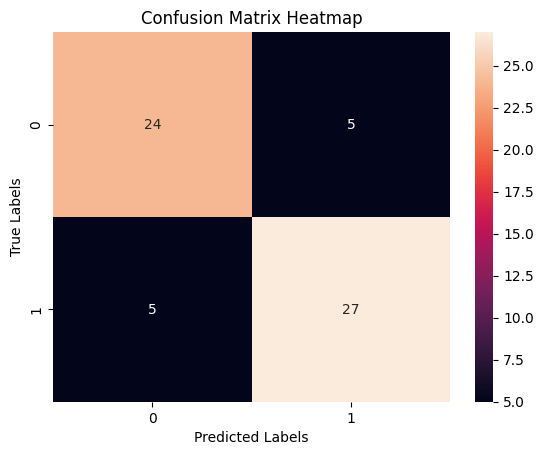

In [24]:
# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()